In [33]:
import pandas as pd
import requests
import json
import seaborn as sns
from pymongo import MongoClient
from pymongo import GEOSPHERE
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
import pandas as pd
from dotenv import load_dotenv
import os
from functools import reduce
import operator
import src.functions as ft
import src.geoqueries as geo
load_dotenv()

True

In [2]:
### FOURSQUARE
tok1 = os.getenv("tok1")
tok2 = os.getenv("tok2")

In [3]:
client = MongoClient("localhost:27017")
db = client.get_database("ironhack")

## Evaluating Los Angeles

In [9]:
#Coordenadas de Los Angeles
coord = [34.052187, -118.243425]
topic = ["basketball", "vegan", "airport", "starbucks", "school", "club", "dog"]

In [10]:
for t in topic:
    geo.Geoquery(coord, t, tok1, tok2)

In [11]:
la_venues = db.get_collection("la_venues")

In [24]:
la_coordinates = [-118.243425, 34.052187]
distance = 10000
city = "la"
#Remember that we had the list of coordinates above. 

<AxesSubplot:xlabel='place', ylabel='count'>

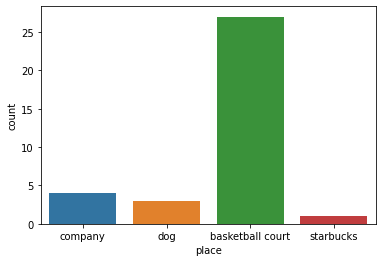

In [34]:
places = geo.creatingPlaces(la_coordinates, distance, la_venues, city)
places.place.value_counts()
sns.countplot(x='place', data=places)

In [31]:
geo.creatingMap(la_coordinates, distance, la_venues, city, coord)